<a href="https://colab.research.google.com/github/fxnnxc/NLP_visualization/blob/master/2.2.Word_Cloud_By_Crawling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.2MB/s 
     |████████████████████████████████| 92kB 8.1MB/s 
     |████████████████████████████████| 3.8MB 37.1MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [66]:
from urllib import request
import re
import requests
from io import BytesIO
from PIL import Image
import numpy as np

In [82]:
# 마스크 이미지를 url에서 불러오기

url = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ9aACep8NBAyAioqO412qTTgDh5p2Ovz-VyA&usqp=CAU"
res = request.urlopen(url).read()
img = Image.open(BytesIO(res))

img = img.resize((700,1500))
mask_ = np.array(img)

for i in range(len(mask_)):
    for j in range(len(mask_[i])):
        if mask_[i][j]==0:
            mask_[i][j] = 255

In [91]:
from bs4 import BeautifulSoup
import requests
from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
search_word = "빅데이터 청년인재"  # 검색어 지정
title_list = []
 
def get_titles(start_num, end_num):
    #start_num ~ end_num까지 크롤링
    while 1:
        if start_num > end_num:
            break
        print(start_num)
 
        url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query={}&start={}'.format(search_word,start_num)
        req = requests.get(url)
 
        # 정상적인 request 확인
        if req.ok:
            html = req.text
            soup = BeautifulSoup(html, 'html.parser')
 
            # 뉴스제목 뽑아오기
            titles = soup.select(
                'ul.type01 > li > dl > dt > a'
            )
 
            # list에 넣어준다
            for title in titles:
                title_list.append(title['title'])
        start_num += 10
    print(title_list)
 
 

#1~200번게시글 까지 크롤링
get_titles(1,200)

1
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151
161
171
181
191
['포스코, AIㆍBig Data 청년인재 양성 앞장', '행정안전부, 공공빅데이터 청년 인턴십 참가자 모집', '공공빅데이터 청년 인턴 참가자 600명 추가 모집', '지자체-대학협력 지역혁신사업 선정…김경수 "인재 양성에 온힘"', '행안부, 공공빅데이터 청년 인턴 참가자 600명 추가 모집', '취업난 해소 나선 포스코, AI 인재 키우고 창업 지원', '폐조선소, AI 인재 양성소 됐다', '경남도, 도시재생 디지털 청년인재 양성사업 추진', 'AI·빅데이터 전문기업 솔트룩스…23일 코스닥 상장', '세종형 빅데이터 청년인재 양성 나선다', '한남대,빅데이터 분야 청년인재 양성사업', '(R) 전국 최초 AI융합 인재 육성 시작', '포스코 “스마트시대 인재 양성”', '부산대, 4차 산업혁명 핵심인재 양성사업 연속 선정', '부산대서 AI·빅데이터 토크콘서트 개최', "한국경제신문, '2020 혁신성장 청년인재 집중양성사업' 빅데이터과정 교육생 모집", '경남대, 통영시와 ‘2020 데이터 청년 캠퍼스 운영대학’ 선정', "기업시민 포스코, 청년 꿈·희망 실현의 산실 '우뚝'", '부산대, 5일 AI·빅데이터 토크콘서트 개최', '세종시, 세종형 빅데이터 청년인재 양성 나선다', '부산대, AI·빅데이터 토크콘서트 개최', 'AI·빅데이터 등 4차산업 청년 인재 1700명 양성한다', '데이터산업진흥원, 2020 데이터 청년 캠퍼스 12개 운영대학과 협약', '상명대, 데이터청년캠퍼스 운영대학 사업 선정', "무료교육인데 취업까지?...빅데이터 양성과정 '눈길'", '서울 거주 미취업여성 IT인재로 키운다', '부산대, 6월 5일 빅데이터 청년캠퍼스 토크 콘서트', "AI·자율차·드론 등 '혁신분야 청년인재' 246명 배출", "혁신성장청년인재양성사업'빅데이터 전략마에스트로과정'개강", '포스코, 무료 숙식에 교육수당까지…청년 취

/usr/local/lib/python3.6/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('포스코', 'Noun'), (',', 'Punctuation'), ('AI', 'Alpha'), ('ㆍ', 'Foreign'), ('Big', 'Alpha'), ('Data', 'Alpha'), ('청년', 'Noun'), ('인재', 'Noun'), ('양성', 'Noun'), ('앞장', 'Noun')]
------------------------------
[('행정안전부', 'Noun'), (',', 'Punctuation'), ('공공', 'Modifier'), ('빅데이터', 'Noun'), ('청년', 'Noun'), ('인턴십', 'Noun'), ('참가자', 'Noun'), ('모집', 'Noun')]
------------------------------
[('공공', 'Modifier'), ('빅데이터', 'Noun'), ('청년', 'Noun'), ('인턴', 'Noun'), ('참가자', 'Noun'), ('600', 'Number'), ('명', 'Noun'), ('추가', 'Noun'), ('모집', 'Noun')]
------------------------------
[('지자체', 'Noun'), ('-', 'Punctuation'), ('대학', 'Noun'), ('협력', 'Noun'), ('지역', 'Noun'), ('혁신', 'Noun'), ('사업', 'Noun'), ('선정', 'Noun'), ('…', 'Punctuation'), ('김경수', 'Noun'), ('"', 'Punctuation'), ('인재', 'Noun'), ('양성', 'Noun'), ('에', 'Josa'), ('온', 'Modifier'), ('힘', 'Noun'), ('"', 'Punctuation')]
------------------------------
[('행안부', 'Noun'), (',', 'Punctuation'), ('공공', 'Modifier'), ('빅데이터', 'Noun'), ('청년', 'Noun'), ('인턴',

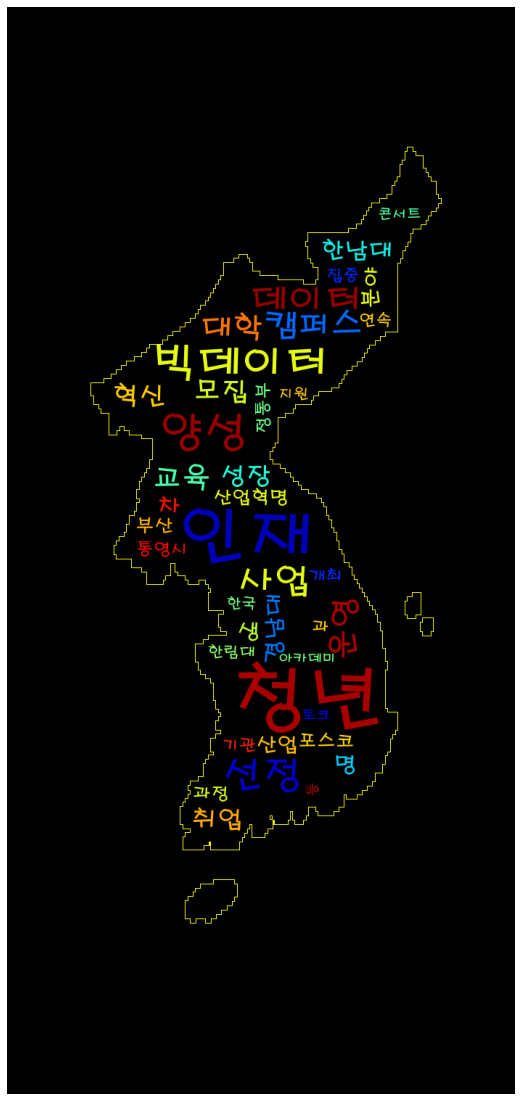

In [93]:
def make_wordcloud(word_count):
    twitter = Twitter()
 
    sentences_tag = []
    #형태소 분석하여 리스트에 넣기
    for sentence in title_list:
        morph = twitter.pos(sentence)
        sentences_tag.append(morph)
        print(morph)
        print('-' * 30)
 
    print(sentences_tag)
    print('\n' * 3)
 
    noun_adj_list = []
    #명사와 형용사만 구분하여 이스트에 넣기
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ['Noun', 'Adjective']:
                noun_adj_list.append(word)
 
    #형태소별 count
    counts = Counter(noun_adj_list)
    tags = counts.most_common(word_count)
    print(tags)
 
    #wordCloud생성
    #한글꺠지는 문제 해결하기위해 font_path 지정
    wc = WordCloud(font_path='/content/H2PORM.TTF', width=700, height=1500, mask=mask_, contour_color="yellow", colormap="jet", contour_width=1, background_color="black")
    print(dict(tags))
    cloud = wc.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(30, 20))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()
#단어 30개까지 wordcloud로 출력
make_wordcloud(40)
